# Instruction the lab-work #1
`TODO`: make the final .ipynb file in format `"{second_name}_{first_name}_{group_id}__lab_1.ipynb"`

First name     - Volodymyr

Second name    - Donets

Group          - KU-31

# Task description

## Overall description

In this work you'll train your ability to understand models predictions, debug models, made conclusions.
You will try to use `Ceteris Paribus` (`CP`), `Individual Conditional Expectation` (`ICE`), `Particular Dependence Plot` (`PDP`), and `SHAP` for explaining your model predictions on the local (for the specific cases) and on the global level.

`WARNING`: usually we conduct analyzing ML model's interpretation on the test set (but what the difference? try to find out it manually).

## `Instructions` for the work

1. Carefully analyze example from this notebook.
2. Choose a dataset which you like the most (or just using your # in group list), also you're free to use models and data from your previous works. And you can use dataset either for classification (binary or multiclass classification is a valid ones) and regression (or even timeseries forecasting)
3. Train 2-3 models on the selected data (it mush be 1 ANN model, and 1-2 any other models for comparison (it could be any model: Linear, Decision Trees, XGBoost, SVM, ...).
4. Select some examples from the test set and build a CP plot and from the training set too. (Are the plots differs?)
5. Build ICE-plots for the same features used in CP plots (are they differ for different models and different sets (train and test)).
6. Build PDP plots for a few features (on the same plot for different models).
7. Working with SHAP, perform analyzing SHAPleay values.
8. Try to answer the question: if the SHAP method differs from the other presented methods?
9. Do NOT forget to leave comments on the each stage of your work.

## Important

1. Do NOT solve the problem in a single cell, such work will be worth 0. If you struggle with Jupyter Notebook just ask for help teacher or your friends. Also, you can solve the lab work in .py files, but provide your report with in .pdf file in the similar format.
2. Do NOT try to steal others works. This year I'll try to consider this. And identical works will be worth 0 too.
3. You can (and probably should) solve the task of the lab work in the separate .ipynb file. Just take this file, clear my solution and replace it with your own.
4. Do NOT forget to leave CONCLUSIONS.

## How to get max num of points without personal work presentation.

As I told you, you can get the maximum mark for all lab works without personal presentation in case of using something different and additional depth of work.
So for this work you can:

1. Make some other type of visualizations (additional, not shown in the work, but that one that appear in the lesson presentation).
2. Work with regression dataset.
3. Try to use other mentioned methods, like `Permutation Feature Importance`, `Integrated Gradients`, and so on (for ANN only).
4. Do experiments like: What happens if we remove important features (or non-important)? What influence it had on the model's performance?


# Data for experiments (You can choose either classification either regression dataset)

## I. Classification datasets:

1. [Liver Cirrhosis Stage Classification](https://www.kaggle.com/datasets/aadarshvelu/liver-cirrhosis-stage-classification)
2. [Star Dataset for Stellar Classification](https://www.kaggle.com/datasets/vinesmsuic/star-categorization-giants-and-dwarfs)
3. [Fitness Classification Dataset](https://www.kaggle.com/datasets/muhammedderric/fitness-classification-dataset-synthetic)
4. [ECG Arrhythmia Classification Dataset](https://www.kaggle.com/datasets/sadmansakib7/ecg-arrhythmia-classification-dataset)
5. [Mushroom Classification Enhanced](https://www.kaggle.com/datasets/sakurapuare/mushroom-classification-enhanced)
6. [Dry Bean Dataset Classification](https://www.kaggle.com/datasets/nimapourmoradi/dry-bean-dataset-classification)
7. [Swarm Behaviour Classification](https://www.kaggle.com/datasets/deepcontractor/swarm-behaviour-classification) -- challenging one 270 Mb dataset
8. [Anemia Types Classification](https://www.kaggle.com/datasets/ehababoelnaga/anemia-types-classification)
9. [NASA: Asteroids Classification](https://www.kaggle.com/datasets/shrutimehta/nasa-asteroids-classification)

## II. Regression datasets:

0. [Gold Price Prediction](https://www.kaggle.com/datasets/franciscogcc/financial-data)
1. [Possum Regression](https://www.kaggle.com/datasets/abrambeyer/openintro-possum/data)
2. [Student Performance](https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression)
3. [Boston House Prices](https://www.kaggle.com/datasets/fedesoriano/the-boston-houseprice-data/data)
4. [Car Price](https://www.kaggle.com/datasets/hellbuoy/car-price-prediction)
5. [Medical Cost](https://www.kaggle.com/datasets/mirichoi0218/insurance)
6. [Crab Age Prediction](https://www.kaggle.com/datasets/sidhus/crab-age-prediction)
7. [Calculate Concrete Strength](https://www.kaggle.com/datasets/prathamtripathi/regression-with-neural-networking)
8. [Advertising dataset](https://www.kaggle.com/datasets/tawfikelmetwally/advertising-dataset)


# Installing & importing dependencies

In [ ]:
%pip install numpy==2.3.3
%pip install pandas==2.3.2
%pip install matplotlib==3.10.6
%pip install seaborn==0.13.2
%pip install tqdm
%pip install scikit-learn==1.7.2
%pip install scipy==1.15.2
%pip install tensorflow==2.20.0
%pip install shap

In [ ]:
%pip freeze

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)

from tqdm import tqdm

from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
from scipy import stats
from sklearn import preprocessing

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

In [50]:
import shap

import tensorflow as tf
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Load & preprocess the data

Source of data: [Cervical Cancer Risk Classification](https://www.kaggle.com/datasets/loveall/cervical-cancer-risk-classification/data)

Data prep and model training: [Kaggle Notebook](https://www.kaggle.com/code/randyrose2017/for-beginners-using-keras-to-build-models)

In [3]:
df_full = pd.read_csv('src/cervical_cancer_risk_classification.csv')
df_full.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [4]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [5]:
df_fullna = df_full.replace('?', np.nan)
df_fullna.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [6]:
df = df_fullna
df = df.apply(pd.to_numeric, errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

In [7]:
df['Number of sexual partners'] = df['Number of sexual partners'].fillna(df['Number of sexual partners'].median())
df['First sexual intercourse'] = df['First sexual intercourse'].fillna(df['First sexual intercourse'].median())
df['Num of pregnancies'] = df['Num of pregnancies'].fillna(df['Num of pregnancies'].median())
df['Smokes'] = df['Smokes'].fillna(1)
df['Smokes (years)'] = df['Smokes (years)'].fillna(df['Smokes (years)'].median())
df['Smokes (packs/year)'] = df['Smokes (packs/year)'].fillna(df['Smokes (packs/year)'].median())
df['Hormonal Contraceptives'] = df['Hormonal Contraceptives'].fillna(1)
df['Hormonal Contraceptives (years)'] = df['Hormonal Contraceptives (years)'].fillna(df['Hormonal Contraceptives (years)'].median())
df['IUD'] = df['IUD'].fillna(0) # Under suggestion
df['IUD (years)'] = df['IUD (years)'].fillna(0) #Under suggestion
df['STDs'] = df['STDs'].fillna(1)
df['STDs (number)'] = df['STDs (number)'].fillna(df['STDs (number)'].median())
df['STDs:condylomatosis'] = df['STDs:condylomatosis'].fillna(df['STDs:condylomatosis'].median())
df['STDs:cervical condylomatosis'] = df['STDs:cervical condylomatosis'].fillna(df['STDs:cervical condylomatosis'].median())
df['STDs:vaginal condylomatosis'] = df['STDs:vaginal condylomatosis'].fillna(df['STDs:vaginal condylomatosis'].median())
df['STDs:vulvo-perineal condylomatosis'] = df['STDs:vulvo-perineal condylomatosis'].fillna(df['STDs:vulvo-perineal condylomatosis'].median())
df['STDs:syphilis'] = df['STDs:syphilis'].fillna(df['STDs:syphilis'].median())
df['STDs:pelvic inflammatory disease'] = df['STDs:pelvic inflammatory disease'].fillna(df['STDs:pelvic inflammatory disease'].median())
df['STDs:genital herpes'] = df['STDs:genital herpes'].fillna(df['STDs:genital herpes'].median())
df['STDs:molluscum contagiosum'] = df['STDs:molluscum contagiosum'].fillna(df['STDs:molluscum contagiosum'].median())
df['STDs:AIDS'] = df['STDs:AIDS'].fillna(df['STDs:AIDS'].median())
df['STDs:HIV'] = df['STDs:HIV'].fillna(df['STDs:HIV'].median())
df['STDs:Hepatitis B'] = df['STDs:Hepatitis B'].fillna(df['STDs:Hepatitis B'].median())
df['STDs:HPV'] = df['STDs:HPV'].fillna(df['STDs:HPV'].median())
df['STDs: Time since first diagnosis'] = df['STDs: Time since first diagnosis'].fillna(df['STDs: Time since first diagnosis'].median())
df['STDs: Time since last diagnosis'] = df['STDs: Time since last diagnosis'].fillna(df['STDs: Time since last diagnosis'].median())

In [8]:
df = pd.get_dummies(data=df, columns=['Smokes','Hormonal Contraceptives','IUD','STDs',
                                      'Dx:Cancer','Dx:CIN','Dx:HPV','Dx','Hinselmann','Citology','Schiller'])

In [9]:
df.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives (years)       0
IUD (years)                           0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0
STDs: Number of diagnosis             0
STDs: Time since first diagnosis      0
STDs: Time since last diagnosis       0
Biopsy                                0


In [10]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs:condylomatosis,...,Dx:HPV_0,Dx:HPV_1,Dx_0,Dx_1,Hinselmann_0,Hinselmann_1,Citology_0,Citology_1,Schiller_0,Schiller_1
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,False,True,False,True,False,True,False,True,False
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,False,True,False,True,False,True,False,True,False
2,34,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,False,True,False,True,False,True,False,True,False
3,52,5.0,16.0,4.0,37.0,37.0,3.0,0.0,0.0,0.0,...,False,True,True,False,True,False,True,False,True,False
4,46,3.0,21.0,4.0,0.0,0.0,15.0,0.0,0.0,0.0,...,True,False,True,False,True,False,True,False,True,False


<Axes: xlabel='STDs (number)', ylabel='count'>

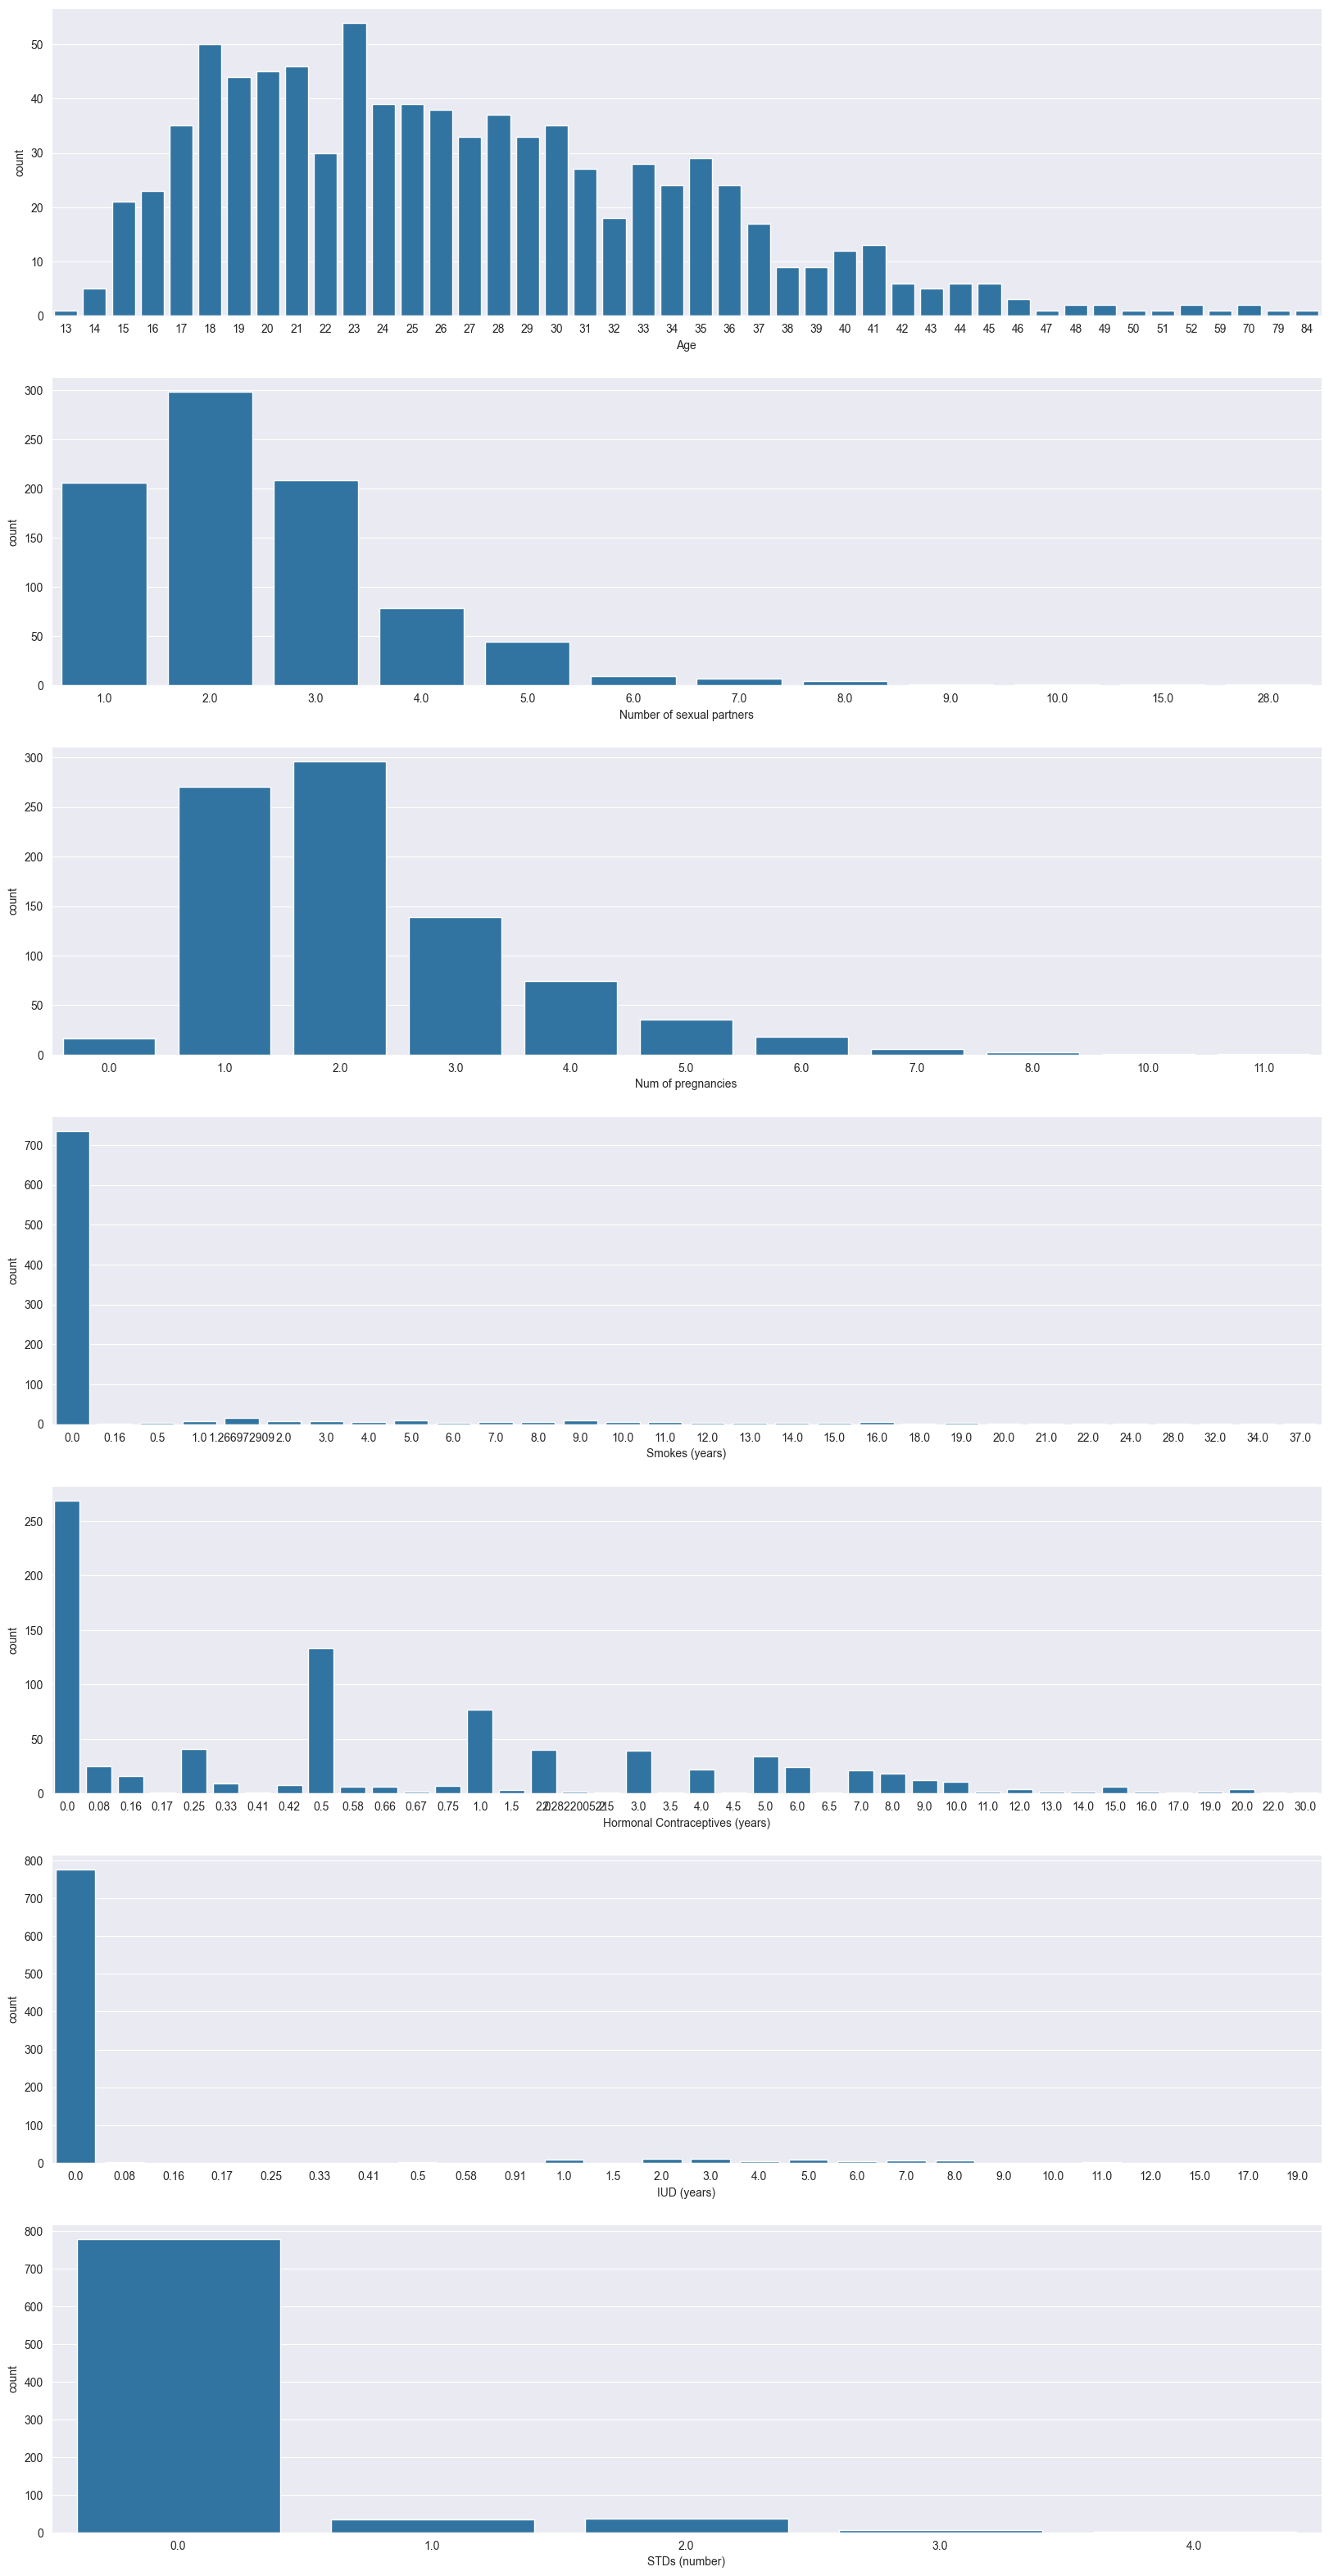

In [11]:
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(7,1,figsize=(20,40))
sns.countplot(x='Age', data=df, ax=ax1)
sns.countplot(x='Number of sexual partners', data=df, ax=ax2)
sns.countplot(x='Num of pregnancies', data=df, ax=ax3)
sns.countplot(x='Smokes (years)', data=df, ax=ax4)
sns.countplot(x='Hormonal Contraceptives (years)', data=df, ax=ax5)
sns.countplot(x='IUD (years)', data=df, ax=ax6)
sns.countplot(x='STDs (number)', data=df, ax=ax7)

In [12]:
#Shuffle
np.random.seed(42)
df_data_shuffle = df.iloc[np.random.permutation(len(df))]

df_train = df_data_shuffle.iloc[1:686, :]
df_test = df_data_shuffle.iloc[686: , :]

In [13]:
features_lst = ['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)',
       'STDs:condylomatosis', 'STDs:cervical condylomatosis',
       'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
       'STDs:syphilis', 'STDs:pelvic inflammatory disease',
       'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS',
       'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis', 
       'Smokes_0.0', 'Smokes_1.0',
       'Hormonal Contraceptives_0.0', 'Hormonal Contraceptives_1.0', 'IUD_0.0',
       'IUD_1.0', 'STDs_0.0', 'STDs_1.0', 'Dx:Cancer_0', 'Dx:Cancer_1',
       'Dx:CIN_0', 'Dx:CIN_1', 'Dx:HPV_0', 'Dx:HPV_1', 'Dx_0', 'Dx_1',
       'Hinselmann_0', 'Hinselmann_1', 'Citology_0', 'Citology_1','Schiller_0','Schiller_1']
target_col = 'Biopsy'

In [14]:
X_train = df_train[features_lst]
y_train = df_train[target_col]

X_test = df_test[features_lst]
y_test = df_test[target_col]

In [15]:
#Normalization
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
minmax_scale.set_output(transform="pandas")
X_train = minmax_scale.fit_transform(X_train)
X_test = minmax_scale.fit_transform(X_test)

In [16]:
X_train.shape, X_test.shape

((685, 46), (172, 46))

In [17]:
print("Training data percentages:")
print(y_train.value_counts(normalize=True) * 100)

print("\nTesting data percentages:")
print(y_test.value_counts(normalize=True) * 100)

Training data percentages:
Biopsy
0    93.138686
1     6.861314
Name: proportion, dtype: float64

Testing data percentages:
Biopsy
0    95.348837
1     4.651163
Name: proportion, dtype: float64


# 2. Prepare machine learning models

README: It could be 2-3 models different types (like ANN from the previous work, SVM, Decision Tree, Random Forest, Rule-based models, Logistic Regression, Linear Models, etc.)

## 2.1. ANN model

In [18]:
ann_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(46,)),
    tf.keras.layers.Dense(
        units=500, kernel_initializer='uniform', activation='relu',
    ),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(
        units=200, kernel_initializer='uniform', activation='relu',
    ),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(
        units=1, kernel_initializer='uniform', activation='sigmoid',
    ),
])
ann_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 500)            │        23,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 200)            │       100,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123,901 (483.99 KB)

 Trainable params: 123,901 (483.99 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
ann_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
train_history = ann_model.fit(
    x=X_train, y=y_train,  
    validation_split=0.2, epochs=20, 
    batch_size=200, verbose=2,
) 

Epoch 1/20
3/3 - 1s - 479ms/step - accuracy: 0.7792 - loss: 0.6646 - val_accuracy: 0.9124 - val_loss: 0.5995
Epoch 2/20
3/3 - 0s - 32ms/step - accuracy: 0.9361 - loss: 0.5574 - val_accuracy: 0.9124 - val_loss: 0.4737
Epoch 3/20
3/3 - 0s - 33ms/step - accuracy: 0.9361 - loss: 0.4170 - val_accuracy: 0.9124 - val_loss: 0.3363
Epoch 4/20
3/3 - 0s - 30ms/step - accuracy: 0.9361 - loss: 0.2734 - val_accuracy: 0.9124 - val_loss: 0.2613
Epoch 5/20
3/3 - 0s - 30ms/step - accuracy: 0.9361 - loss: 0.2084 - val_accuracy: 0.9124 - val_loss: 0.2731
Epoch 6/20
3/3 - 0s - 32ms/step - accuracy: 0.9361 - loss: 0.2241 - val_accuracy: 0.9124 - val_loss: 0.3024
Epoch 7/20
3/3 - 0s - 28ms/step - accuracy: 0.9361 - loss: 0.2222 - val_accuracy: 0.9124 - val_loss: 0.2934
Epoch 8/20
3/3 - 0s - 30ms/step - accuracy: 0.9361 - loss: 0.2089 - val_accuracy: 0.9124 - val_loss: 0.2599
Epoch 9/20
3/3 - 0s - 30ms/step - accuracy: 0.9361 - loss: 0.1890 - val_accuracy: 0.9124 - val_loss: 0.2172
Epoch 10/20
3/3 - 0s - 30ms

In [21]:
def show_train_history(train_history_,train,validation):
    plt.plot(train_history_.history[train])
    plt.plot(train_history_.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='best')
    plt.show()

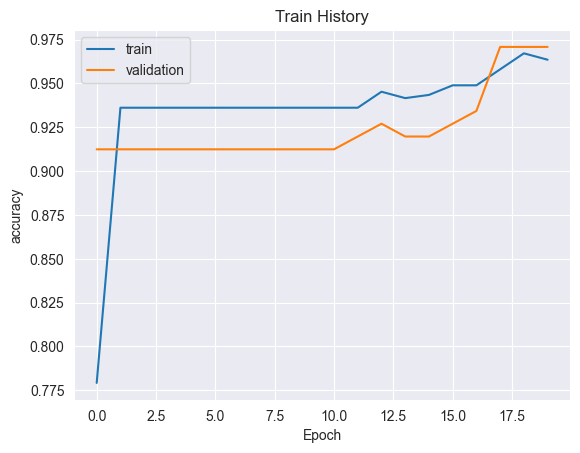

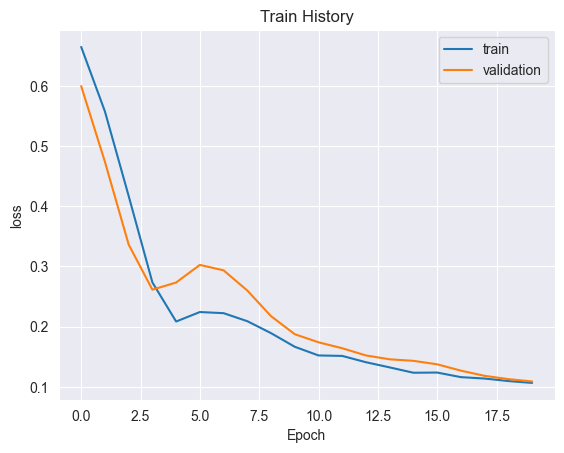

In [22]:
show_train_history(train_history,'accuracy','val_accuracy')
show_train_history(train_history,'loss','val_loss')

In [23]:
train_scores = ann_model.evaluate(X_train, y_train)
test_scores = ann_model.evaluate(X_test, y_test)
print('Train accuracy=', train_scores[1])
print('Test accuracy=', test_scores[1])

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9713 - loss: 0.0893 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9647 - loss: 0.0757 
Train accuracy= 0.9664233326911926
Test accuracy= 0.9476743936538696


## 2.2. Training Logistic regression model

In [24]:
lin_model = LogisticRegression(max_iter=1000, class_weight='balanced')

lin_model.fit(X_train, y_train)

y_pred_train = lin_model.predict(X_train)
y_pred_test = lin_model.predict(X_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       638
           1       0.62      0.91      0.74        47

    accuracy                           0.96       685
   macro avg       0.81      0.94      0.86       685
weighted avg       0.97      0.96      0.96       685

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       164
           1       0.44      1.00      0.62         8

    accuracy                           0.94       172
   macro avg       0.72      0.97      0.79       172
weighted avg       0.97      0.94      0.95       172



## 2.3. Training SVM Classifier model

In [28]:
svm_model = SVC(kernel='rbf', class_weight='balanced', random_state=23, probability=True)

svm_model.fit(X_train, y_train)

y_pred_train = svm_model.predict(X_train)
y_pred_test = svm_model.predict(X_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       638
           1       0.66      0.91      0.77        47

    accuracy                           0.96       685
   macro avg       0.83      0.94      0.87       685
weighted avg       0.97      0.96      0.96       685

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       164
           1       0.44      1.00      0.62         8

    accuracy                           0.94       172
   macro avg       0.72      0.97      0.79       172
weighted avg       0.97      0.94      0.95       172



# 3. CP plot

README: select a few interested for your features and build CP plots, try to explain what you see on plots

In [39]:
def cp_plot(sample_no, feature_, source_set,):
    # 1. Isolate the 3rd observation (Index 2) from your raw, UNSCALED test data
    instance = source_set.iloc[sample_no].copy()
    actual_age = instance[feature_]
    
    # 2. Create a synthetic range of ages (e.g., from the youngest to oldest in your data)
    age_range = np.linspace(source_set[feature_].min(), source_set[feature_].max(), 100)
    
    # 3. Create a synthetic dataframe where EVERYTHING is frozen except Age
    synthetic_data = pd.DataFrame([instance] * len(age_range))
    synthetic_data[feature_] = age_range
    
    # 4. Get the predicted probability of Class 1 (Cancer) for all models
    # Logistic regression usually doesn't need scaling, so we use the raw synthetic data
    prob_lin = lin_model.predict_proba(synthetic_data)[:, 1]
    
    # SVM and ANN need the scaled data
    prob_svm = svm_model.predict_proba(synthetic_data)[:, 1]
    
    # ANNs (like Keras/TensorFlow) usually output probabilities directly in a 2D array, 
    # so we use .flatten() to make it a standard 1D list for plotting
    prob_ann = ann_model.predict(synthetic_data).flatten()
    
    # 6. Plot the Ceteris Paribus Profiles
    plt.figure(figsize=(10, 6))
    
    # Plot the lines for each model
    plt.plot(age_range, prob_lin, label='Logistic Regression', linewidth=2)
    plt.plot(age_range, prob_svm, label='SVM', linewidth=2, linestyle='--')
    plt.plot(age_range, prob_ann, label='ANN', linewidth=2, linestyle='-.')
    
    # Draw a vertical line showing the actual age of this specific patient
    plt.axvline(x=actual_age, color='red', alpha=0.5, label=f'Actual "{feature_}": ({actual_age:.1f})')
    
    plt.title(f"Ceteris Paribus Plot: Effect of '{feature_} on Cancer Probability (Instance #3)")
    plt.xlabel("Age")
    plt.ylabel("Predicted Probability of Cancer")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


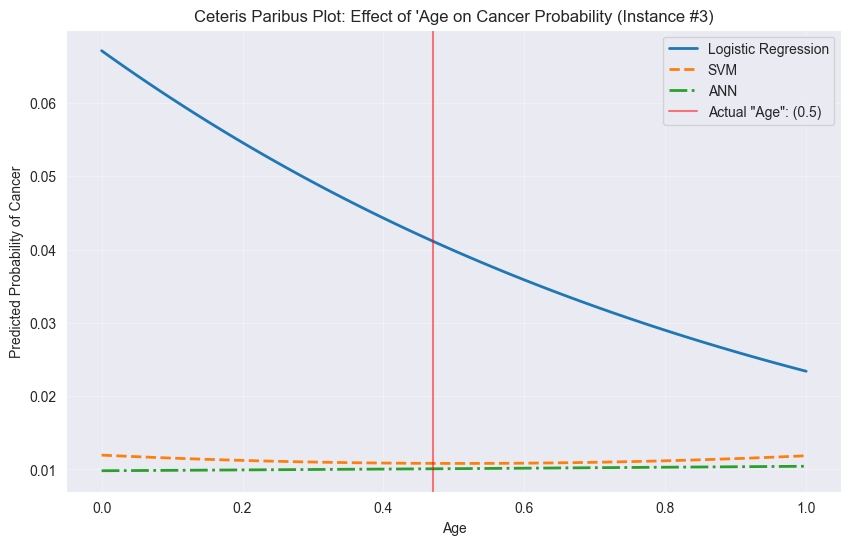

In [40]:
cp_plot(10, "Age", X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


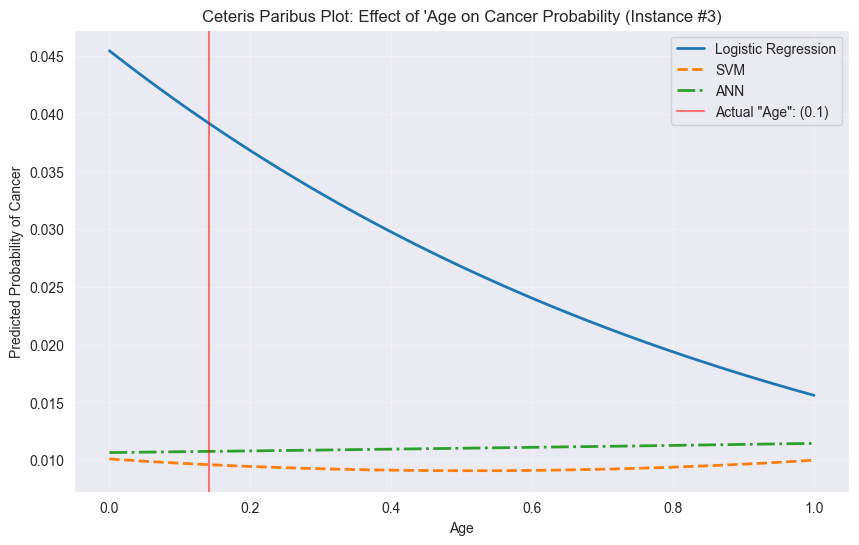

In [41]:
cp_plot(0, "Age", X_train)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  


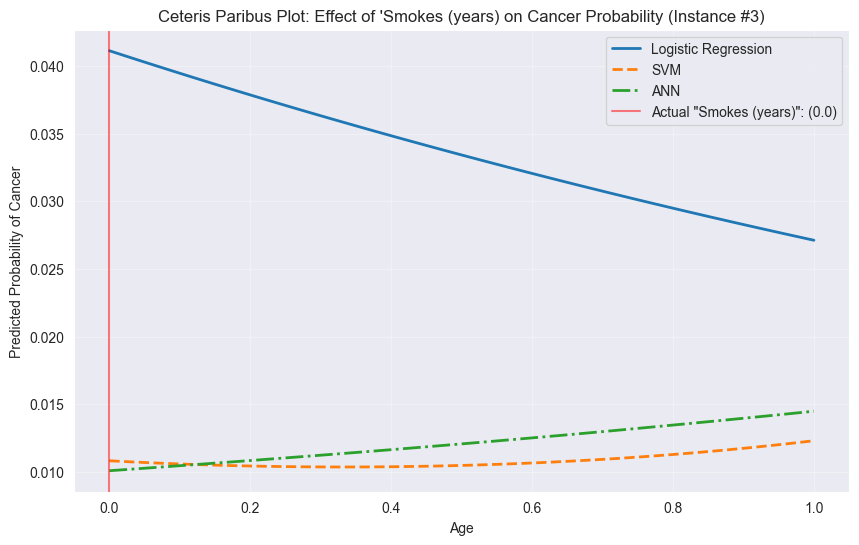

In [42]:
cp_plot(10, "Smokes (years)", X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


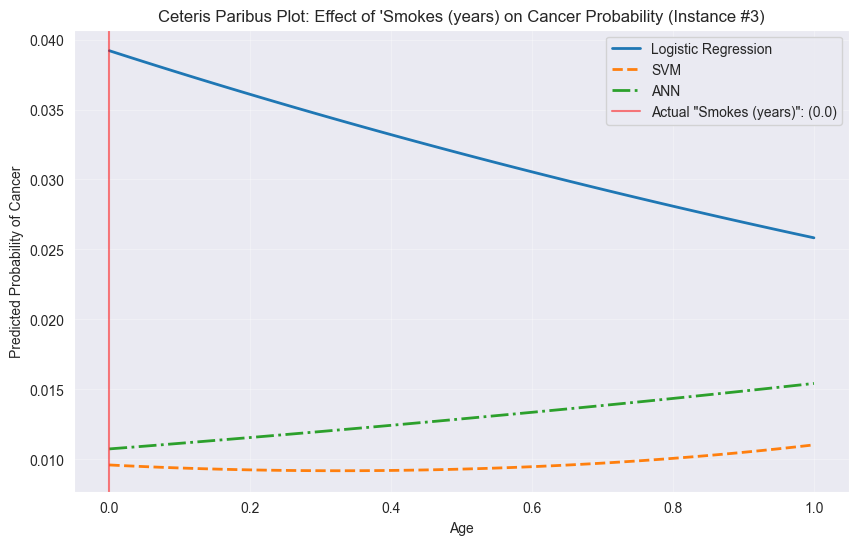

In [43]:
cp_plot(0, "Smokes (years)", X_train)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


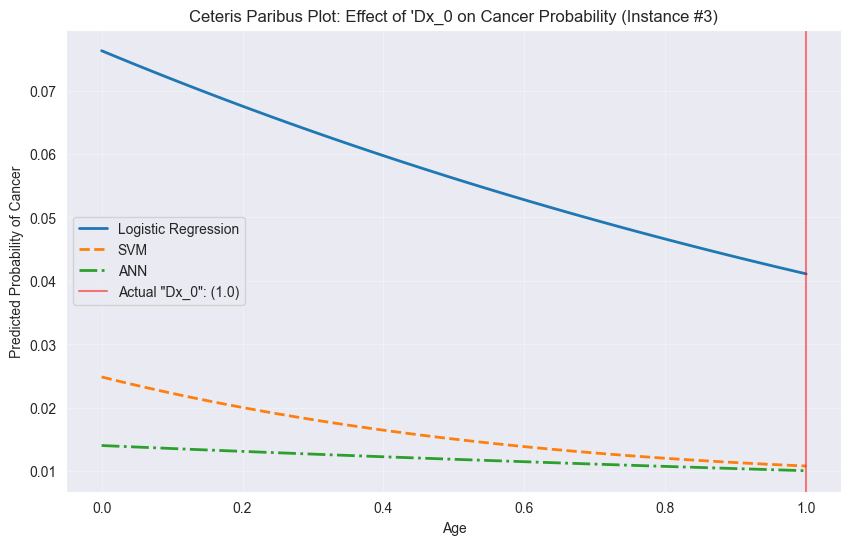

In [44]:
cp_plot(10, "Dx_0", X_test)

# 4. ICE (and PDB) plot

In [45]:
def ice_plot(feature_, source_set, sample_size=200):
    # 1. Sample the dataset to keep the plot readable and computation fast
    # If the dataset is smaller than the sample size, just use the whole dataset
    if len(source_set) > sample_size:
        sampled_set = source_set.sample(sample_size, random_state=42)
    else:
        sampled_set = source_set
        
    # 2. Create the synthetic range for the chosen feature
    feature_range = np.linspace(source_set[feature_].min(), source_set[feature_].max(), 100)
    
    # 3. Set up the figure with 3 side-by-side subplots
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
    fig.suptitle(f'ICE Plots: Effect of {feature_} on Cancer Probability', fontsize=16)
    
    # Lists to store all predictions so we can easily calculate the PDP (average) line later
    all_prob_lin = []
    all_prob_svm = []
    all_prob_ann = []
    
    # 4. Loop through each sampled instance and generate its CP profile
    print(f"Generating ICE curves for {len(sampled_set)} instances...")
    for i in range(len(sampled_set)):
        instance = sampled_set.iloc[i].copy()
        
        # Create synthetic dataframe for this specific instance
        synthetic_data = pd.DataFrame([instance] * len(feature_range))
        synthetic_data[feature_] = feature_range
        
        # Get predictions
        prob_lin = lin_model.predict_proba(synthetic_data)[:, 1]
        prob_svm = svm_model.predict_proba(synthetic_data)[:, 1]
        prob_ann = ann_model.predict(synthetic_data, verbose=0).flatten() # verbose=0 stops Keras spam
        
        # Store for the average calculation
        all_prob_lin.append(prob_lin)
        all_prob_svm.append(prob_svm)
        all_prob_ann.append(prob_ann)
        
        # Plot the individual ICE lines with low opacity (alpha=0.1)
        axes[0].plot(feature_range, prob_lin, color='blue', alpha=0.1)
        axes[1].plot(feature_range, prob_svm, color='green', alpha=0.1)
        axes[2].plot(feature_range, prob_ann, color='orange', alpha=0.1)

    # 5. BONUS: Calculate and plot the Partial Dependence Plot (PDP) line!
    # The PDP is literally just the average of all the ICE lines.
    axes[0].plot(feature_range, np.mean(all_prob_lin, axis=0), color='black', linewidth=3, label='PDP (Average)')
    axes[1].plot(feature_range, np.mean(all_prob_svm, axis=0), color='black', linewidth=3, label='PDP (Average)')
    axes[2].plot(feature_range, np.mean(all_prob_ann, axis=0), color='black', linewidth=3, label='PDP (Average)')

    # 6. Formatting the plots
    titles = ['Logistic Regression', 'SVM', 'ANN']
    for j, ax in enumerate(axes):
        ax.set_title(titles[j])
        ax.set_xlabel(feature_)
        ax.grid(True, alpha=0.3)
        ax.legend()
        
    axes[0].set_ylabel('Predicted Probability of Cancer')
    plt.tight_layout()
    plt.show()

Generating ICE curves for 172 instances...


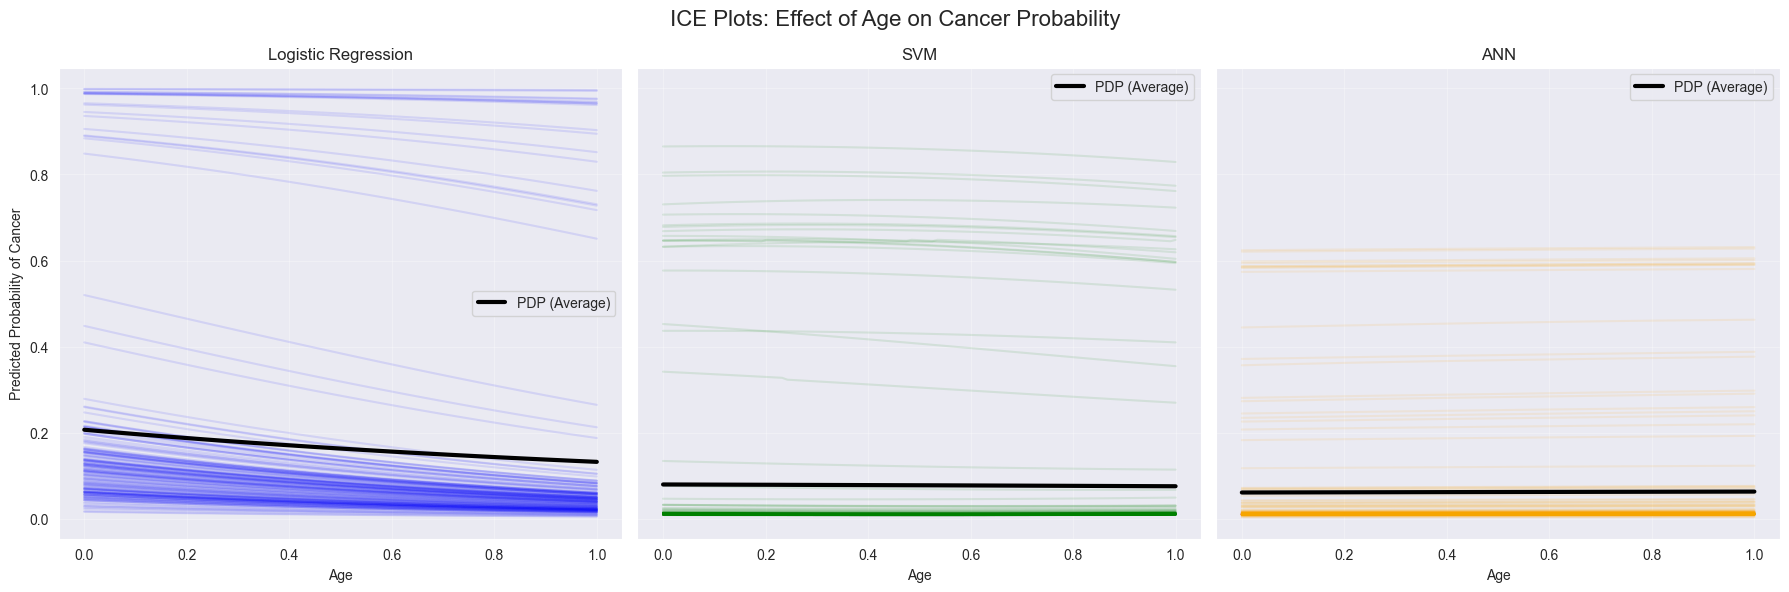

In [46]:
ice_plot("Age", X_test)

Generating ICE curves for 172 instances...


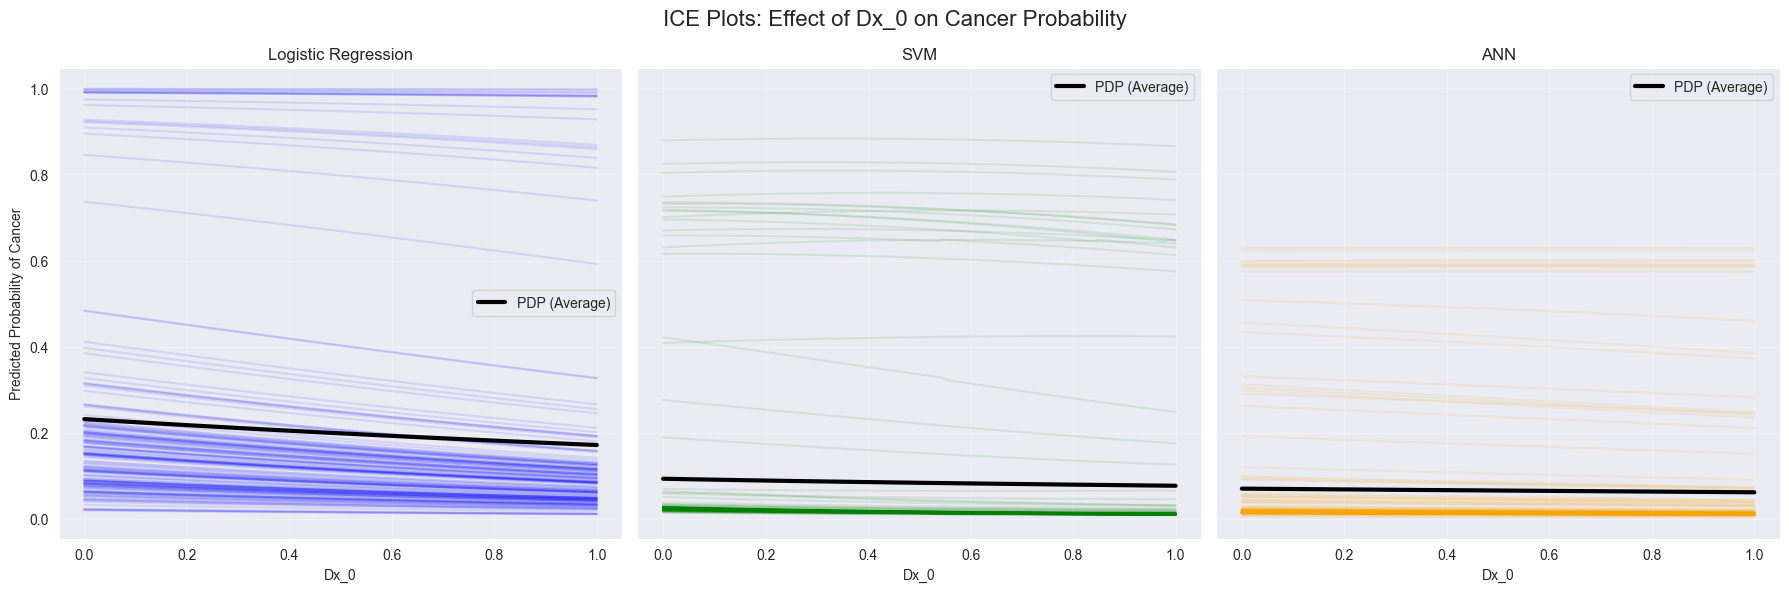

In [47]:
ice_plot("Dx_0", X_test)

Generating ICE curves for 172 instances...


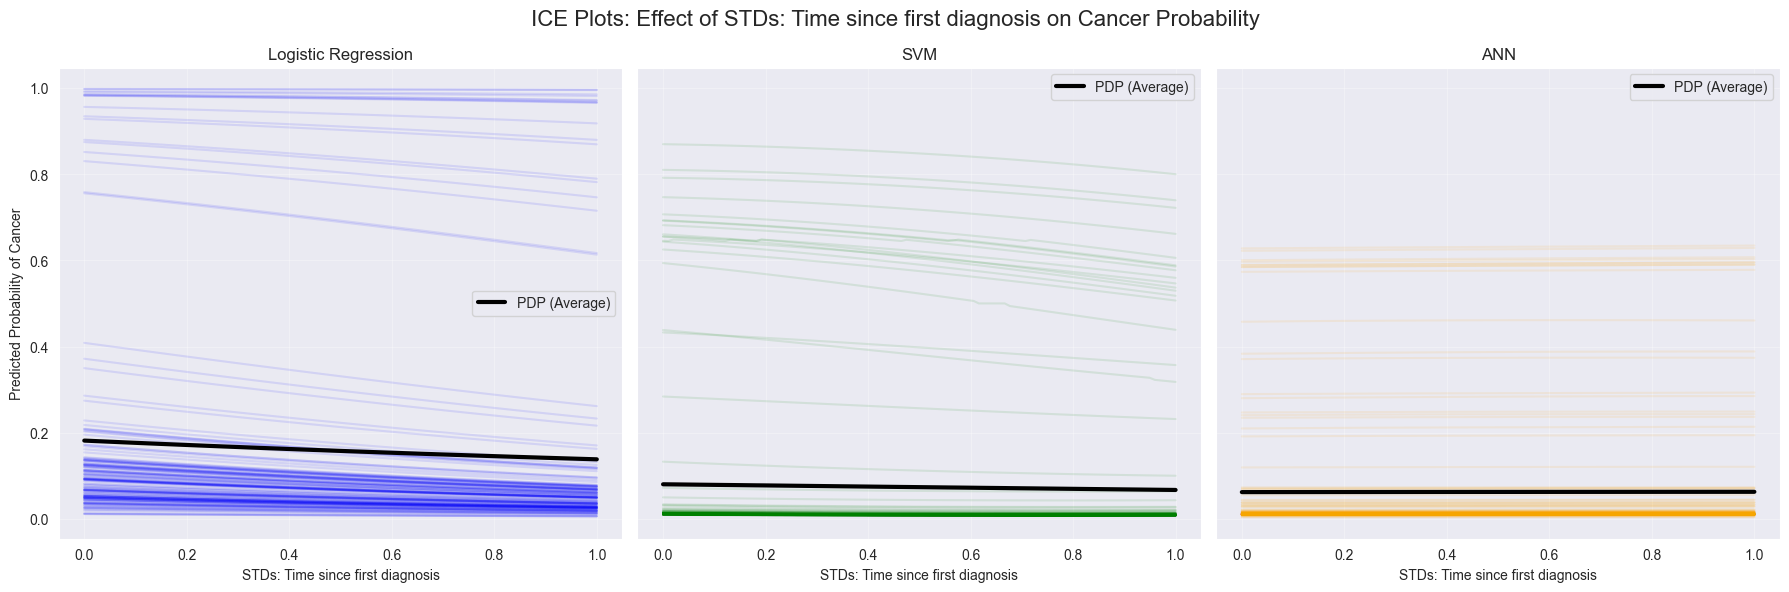

In [48]:
ice_plot("STDs: Time since first diagnosis", X_test)

# 5. SHAP method usage (SVM-model example)

In [51]:
# 1. Initialize javascript for some of SHAP's interactive plots
shap.initjs()

In [53]:
# 2. Create a standardized prediction wrapper
# SHAP needs a function that just takes data and spits out a 1D array of probabilities.
def predict_prob_class1(x):
    # Ensure the input is treated as a dataframe with correct columns if x is passed as an array
    if not isinstance(x, pd.DataFrame):
        x = pd.DataFrame(x, columns=X_test.columns)
    return svm_model.predict_proba(x)[:, 1]

# 3. Create the Explainer
# We give SHAP a small "background" dataset (e.g., 200 rows) so it knows what the "average" patient looks like.
# But you can use all your data (it might take much more time)
background_data = shap.sample(X_test, 200, random_state=23)
explainer = shap.Explainer(predict_prob_class1, background_data)

In [58]:
# 4. Calculate SHAP values
# Let's calculate the values for another 50 random patients to plot. 
# (Increase this number later if you want a denser plot and have time to wait!)
# patients_to_explain = X_test.sample(50, random_state=42)
patients_to_explain = X_test
print("Calculating SHAP values (this might take a moment)...")
shap_values = explainer(patients_to_explain)

Calculating SHAP values (this might take a moment)...


PermutationExplainer explainer: 173it [00:38,  3.33it/s]                         


## 5.1. SHAP for local explanations

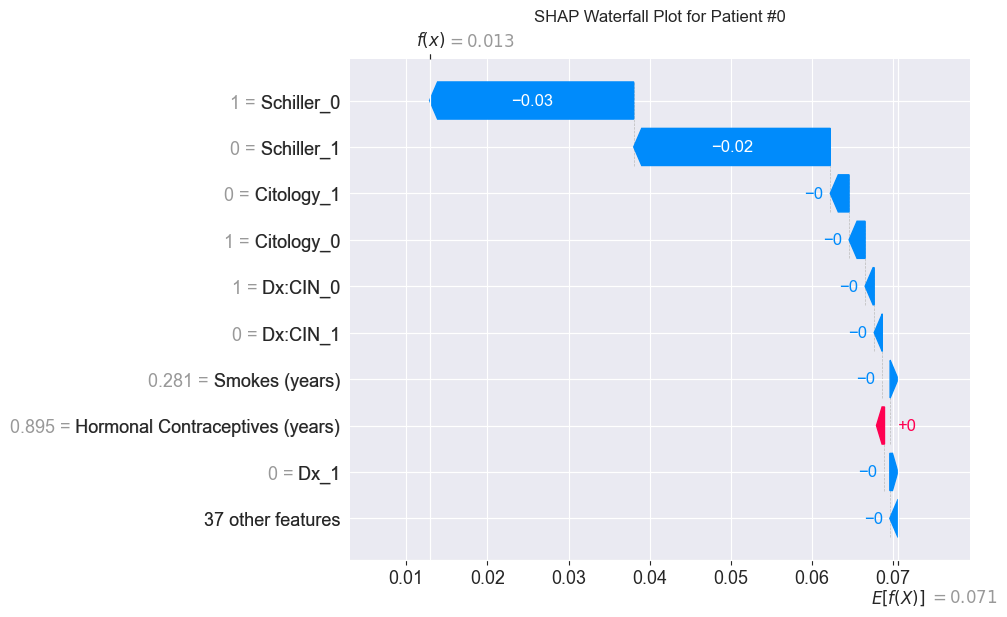

In [59]:
# ---------------------------------------------------------
# Plot: The Local Waterfall Plot (Single Patient)
# ---------------------------------------------------------
patient_index = 0 


plt.figure()
plt.title(f"SHAP Waterfall Plot for Patient #{patient_index}")
# The waterfall plot explains exactly how we got from the dataset's average probability
# to this specific patient's predicted probability.
shap.plots.waterfall(shap_values[patient_index])
plt.show()

## 5.2. SHAP for global explanations

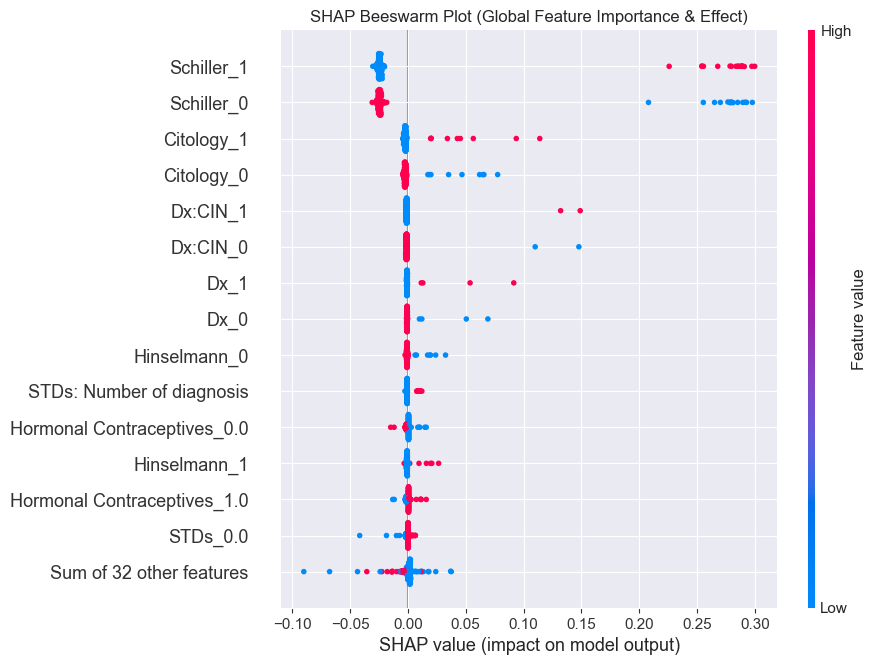

In [61]:
# ---------------------------------------------------------
# Plot: The Global Beeswarm Plot (Feature Importance)
# ---------------------------------------------------------
plt.figure()
plt.title("SHAP Beeswarm Plot (Global Feature Importance & Effect)")
shap.plots.beeswarm(shap_values, max_display=15) # You can change number of features to observe
plt.show()

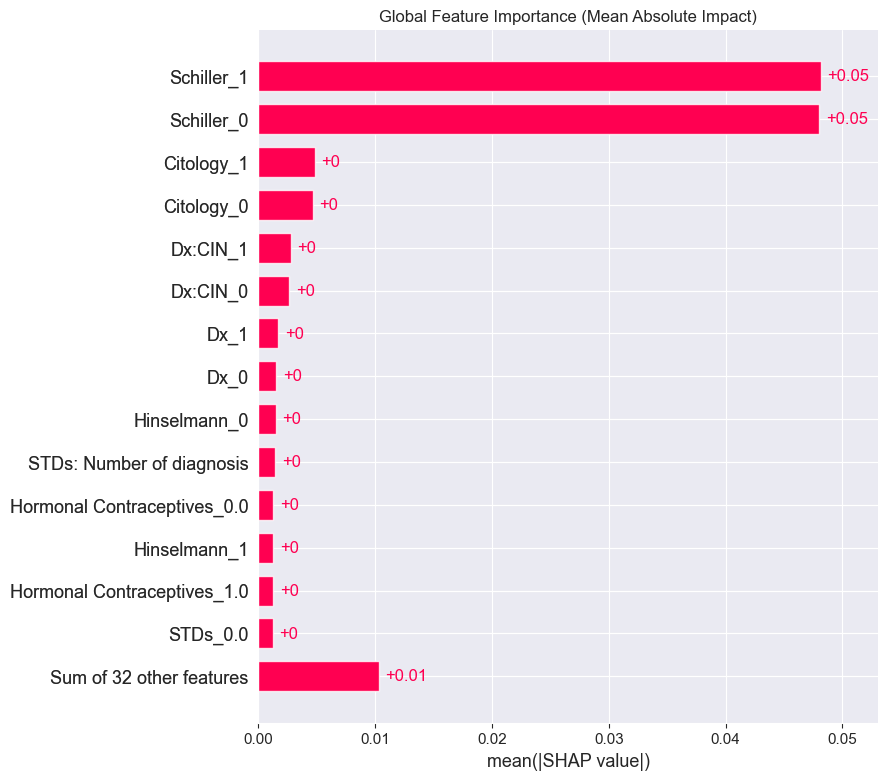

In [63]:
# We reuse the 'shap_values' object calculated in the previous step
plt.figure()
plt.title("Global Feature Importance (Mean Absolute Impact)")

# The 'bar' plot automatically aggregates the absolute SHAP values
shap.plots.bar(shap_values, max_display=15)

plt.show()

# Conclusions

README: 